okay...let's try to import some data and then clean it up using pandas in order to fit a curve
https://www.ishares.com/us/products/239566/ishares-iboxx-investment-grade-corporate-bond-etf

In [14]:
import pandas as pd

In [15]:
df = pd.read_excel('C:/Users/dstoc/Documents/Python Scripts/First Project/QLTA.xlsx')

In [16]:
print(df.head(10))

                                Name                 Sector   Asset Class  \
0       ANHEUSER-BUSCH COMPANIES LLC  Consumer Non-Cyclical  Fixed Income   
1  PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
2  PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
3              MICROSOFT CORPORATION             Technology  Fixed Income   
4                           VISA INC             Technology  Fixed Income   
5          WELLS FARGO & COMPANY MTN                Banking  Fixed Income   
6          WELLS FARGO & COMPANY MTN                Banking  Fixed Income   
7              MICROSOFT CORPORATION             Technology  Fixed Income   
8                      CITIGROUP INC                Banking  Fixed Income   
9                          APPLE INC             Technology  Fixed Income   

       CUSIP  Market Value  Weight (%)  Notional Value  Par Value  \
0  03522AAJ9    3972588.66     0.45249      3972588.66    4105000   
1  716973AG7  

In [17]:
print(df.tail)

<bound method NDFrame.tail of                                     Name                 Sector   Asset Class  \
0           ANHEUSER-BUSCH COMPANIES LLC  Consumer Non-Cyclical  Fixed Income   
1      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
2      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical  Fixed Income   
3                  MICROSOFT CORPORATION             Technology  Fixed Income   
4                               VISA INC             Technology  Fixed Income   
...                                  ...                    ...           ...   
2735                         ONE GAS INC            Natural Gas  Fixed Income   
2736  MITSUBISHI UFJ FINANCIAL GROUP INC                Banking  Fixed Income   
2737                           3M CO MTN          Capital Goods  Fixed Income   
2738         JOHN DEERE CAPITAL CORP MTN          Capital Goods  Fixed Income   
2739         JOHN DEERE CAPITAL CORP MTN          Capital Goods  Fixed Income  

In [18]:
list(df.columns)

['Name',
 'Sector',
 'Asset Class',
 'CUSIP',
 'Market Value',
 'Weight (%)',
 'Notional Value',
 'Par Value',
 'Location',
 'Exchange',
 'Currency',
 'Duration',
 'YTM (%)',
 'FX Rate',
 'Maturity',
 'Coupon (%)',
 'Mod. Duration',
 'Yield to Call (%)',
 'Yield to Worst (%)',
 'Real Duration',
 'Real YTM (%)',
 'Market Currency',
 'Accrual Date',
 'Effective Date']

In [19]:
df2 = df[['Name',
 'Sector',
 'Weight (%)',
 'Notional Value',
 'CUSIP',
 #'Price',
 'Duration',
 'YTM (%)',
 'Maturity',
 'Coupon (%)',
 'Mod. Duration',
 'Yield to Worst (%)']]

df2 = df2.iloc[0:len(df2),]

In [20]:
from datetime import datetime
date_str = "1-Feb-46"
date_format = "%d-%b-%y"

# Convert the date string to a datetime object
date_obj = datetime.strptime(date_str, date_format)

# Get the current date as a datetime object
current_date = datetime.now()

# Calculate the difference in days
years_away = (date_obj - current_date).days / 365

print(years_away)

22.66849315068493


In [21]:
import pandas as pd
from datetime import datetime

# Create a sample DataFrame with a 'Date' column
data = {'Date': ['13-May-19', '15-Jun-19', '22-Jul-19']}
df_example = pd.DataFrame(data)

# Define the date format
date_format = "%d-%b-%y"

# Define a function to convert a date string to the number of days away
def convert_to_days(date_str):
    date_obj = datetime.strptime(date_str, date_format)
    current_date = datetime.now()
    days_away = (date_obj - current_date).days
    return days_away

# Apply the function to the 'Date' column
df_example['Days Away'] = df_example['Date'].apply(convert_to_days)

# Print the updated DataFrame
print(df_example)


        Date  Days Away
0  13-May-19      -1487
1  15-Jun-19      -1454
2  22-Jul-19      -1417


In [22]:
import pandas as pd
from datetime import datetime, timedelta

# Create a sample DataFrame with a 'Date' column
#data = {'Date': ['13-May-19', '15-Jun-19', '22-Jul-19']}
#df = pd.DataFrame(data)

# Define the date format
date_format = "%b %d, %Y"

# Define a function to convert a date string to the number of days away
def convert_to_years(date_str):
    date_obj = datetime.strptime(date_str, date_format)
    current_date = datetime.now()
    years_away = (date_obj - current_date).days / 365

    if years_away < 0:
        years_away = years_away + 100  # Add 100 years (365.25 days per year on average)
    
    return years_away

# Apply the function to the 'Date' column
df2['MaturityYears'] = df2['Maturity'].apply(convert_to_years)

# Print the updated DataFrame
print(df2)


                                    Name                 Sector  Weight (%)  \
0           ANHEUSER-BUSCH COMPANIES LLC  Consumer Non-Cyclical     0.45249   
1      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical     0.21273   
2      PFIZER INVESTMENT ENTERPRISES PTE  Consumer Non-Cyclical     0.18638   
3                  MICROSOFT CORPORATION             Technology     0.16505   
4                               VISA INC             Technology     0.15571   
...                                  ...                    ...         ...   
2735                         ONE GAS INC            Natural Gas     0.00105   
2736  MITSUBISHI UFJ FINANCIAL GROUP INC                Banking     0.00104   
2737                           3M CO MTN          Capital Goods     0.00093   
2738         JOHN DEERE CAPITAL CORP MTN          Capital Goods     0.00058   
2739         JOHN DEERE CAPITAL CORP MTN          Capital Goods     0.00058   

      Notional Value      CUSIP  Duration  YTM (%) 

In [23]:
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, errorfn_ns_ols
from matplotlib import pyplot as plt

In [24]:
df2['Sector'].unique()

array(['Consumer Non-Cyclical', 'Technology', 'Banking',
       'Consumer Cyclical', 'Communications', 'Energy', 'Insurance',
       'Transportation', 'Basic Industry', 'Electric', 'Capital Goods',
       'Brokerage/Asset Managers/Exchanges', 'Reits', 'Natural Gas',
       'Industrial Other', 'Financial Other'], dtype=object)

In [42]:
df3 = df2.loc[df2['Sector'] == 'Communications']
df3.head

<bound method NDFrame.head of                               Name          Sector  Weight (%)  \
12             COMCAST CORPORATION  Communications     0.13284   
22             COMCAST CORPORATION  Communications     0.12227   
24              META PLATFORMS INC  Communications     0.12065   
31             COMCAST CORPORATION  Communications     0.11518   
57             COMCAST CORPORATION  Communications     0.10362   
...                            ...             ...         ...   
2121                WALT DISNEY CO  Communications     0.01936   
2248           COMCAST CORPORATION  Communications     0.01787   
2299  TWDC ENTERPRISES 18 CORP MTN  Communications     0.01708   
2402           COMCAST CORPORATION  Communications     0.01529   
2474                WALT DISNEY CO  Communications     0.01382   

      Notional Value      CUSIP  Duration  YTM (%)      Maturity  Coupon (%)  \
12        1166292.35  20030NDU2     17.87     5.25  Nov 01, 2056        2.94   
22        1073422

In [79]:
df3.sort_values('MaturityYears')
df3.head(5)

,Name,Sector,Weight (%),Notional Value,CUSIP,Duration,YTM (%),Maturity,Coupon (%),Mod. Duration,Yield to Worst (%),MaturityYears
12,COMCAST CORPORATION,Communications,0.13284,1166292.35,20030NDU2,17.87,5.25,"Nov 01, 2056",2.94,17.66,5.25,33.424658
22,COMCAST CORPORATION,Communications,0.12227,1073422.36,20030NCT6,4.66,4.75,"Oct 15, 2028",4.15,4.71,4.75,5.358904
24,META PLATFORMS INC,Communications,0.12065,1059267.82,30303M8J4,14.91,5.51,"Aug 15, 2052",4.45,14.85,5.51,29.208219
31,COMCAST CORPORATION,Communications,0.11518,1011251.48,20030NDS7,16.71,5.24,"Nov 01, 2051",2.89,16.67,5.24,28.419178
57,COMCAST CORPORATION,Communications,0.10362,909704.95,20030NCS8,2.14,4.86,"Oct 15, 2025",3.95,2.21,4.86,2.356164


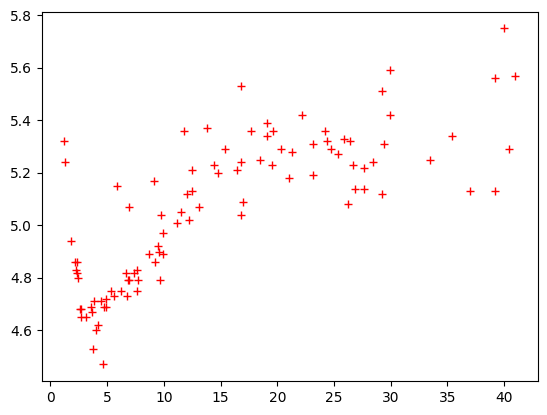

In [85]:
time = np.array(df3["MaturityYears"])
yld = np.array(df3["Yield to Worst (%)"])

plt.plot(time,yld, "r+");

In [86]:
curve, status = calibrate_ns_ols(
    time,yld, tau0=0.10
)  # starting value of 1.0 for the optimization of tau
assert status.success
curve

NelsonSiegelCurve(beta0=5.510450228049193, beta1=1.517219654871389, beta2=-4.981899944447357, tau=1.450489974535028)

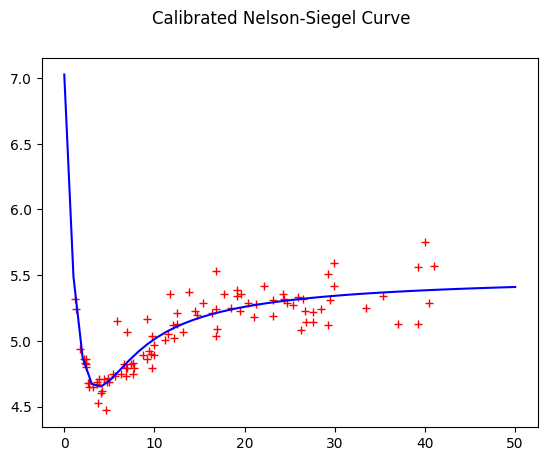

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Calibrated Nelson-Siegel Curve")
ax.plot(time, yld, "r+")
t2 = np.linspace(0, 50)
ax.plot(t2, curve(t2), "b-");

In [88]:
taus = np.linspace(0.05, 10, 300)
err = np.array([errorfn_ns_ols(tau, yld, time) for tau in taus])

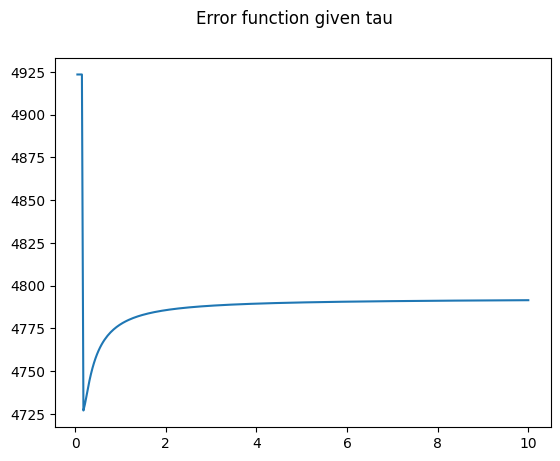

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle("Error function given tau")
ax.plot(taus, err);

# Calculate distance of each bond's yield from the curve

In [93]:
Yhat = df3['Yield to Worst (%)'].apply(curve)
df3.loc[:,'Yhat'] = Yhat



In [94]:
Spread_to_Curve = df3['Yield to Worst (%)'] - df3['Yhat']
df3.loc[:,'Spread to Curve'] = Spread_to_Curve

# Calculate additional performance driven by compression of bond's yield to the curve
% Change in Price = - Duration x Change in Spread

In [96]:
df3.loc[:,'Implied Performance'] = df3['Duration'] * df3['Spread to Curve']

In [98]:
df_final = df3
# Write the DataFrame to an Excel file
df_final.to_excel('NS_output.xlsx', index=False)